In [1]:
import numpy as np
import scipy.signal as sig
import scipy.fftpack as fft
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
chirpfile = 'chirp1024.txt'
sre, sim = np.loadtxt(chirpfile, unpack=True, skiprows=1)
sz = sre + 1j * sim

In [3]:
chirprate = 1e6
dt = 1/chirprate
N = 1024
fmin = -chirprate/2
fmax = chirprate/2
df = fmax - fmin

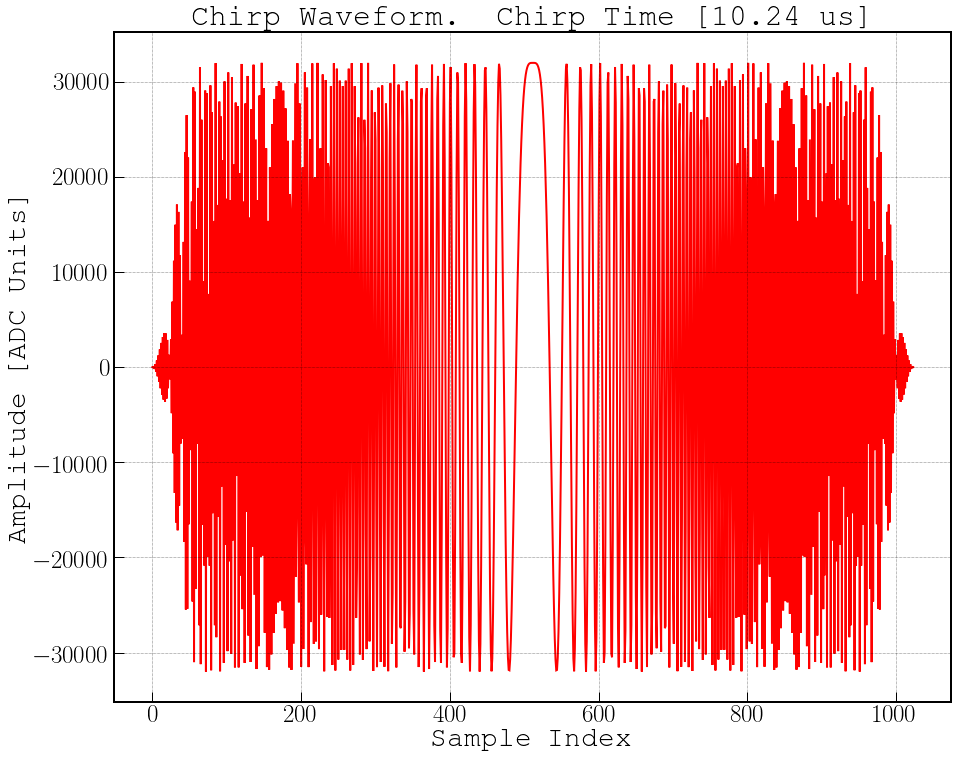

In [4]:
fig, ax = plt.subplots(figsize=(15,12))
ax.plot(sre, 'r')
ax.grid(which='both')
ax.axis('tight');
ax.set_xlabel('Sample Index');
ax.set_ylabel('Amplitude [ADC Units]')
ax.set_title('Chirp Waveform. Chirp Time [10.24 us]')
plt.savefig('chirp.png');

In [5]:
freq = fft.fftshift(fft.fftfreq(N, dt))
sz_fft = fft.fftshift(fft.fft(sz))

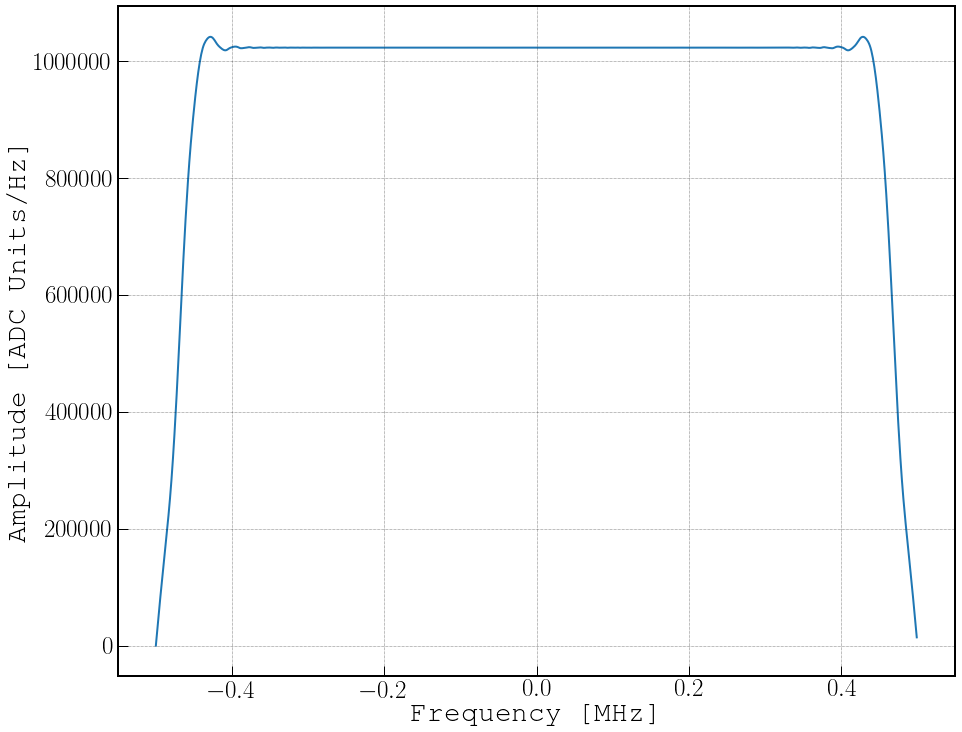

In [6]:
fig, ax = plt.subplots(figsize=(15,12))
ax.plot(freq/1e6, np.abs(sz_fft))
# ax.plot(np.imag(s), 'b')
ax.grid(which='both')
ax.set_xlabel('Frequency [MHz]')
ax.set_ylabel('Amplitude [ADC Units/Hz]')
ax.axis('tight');

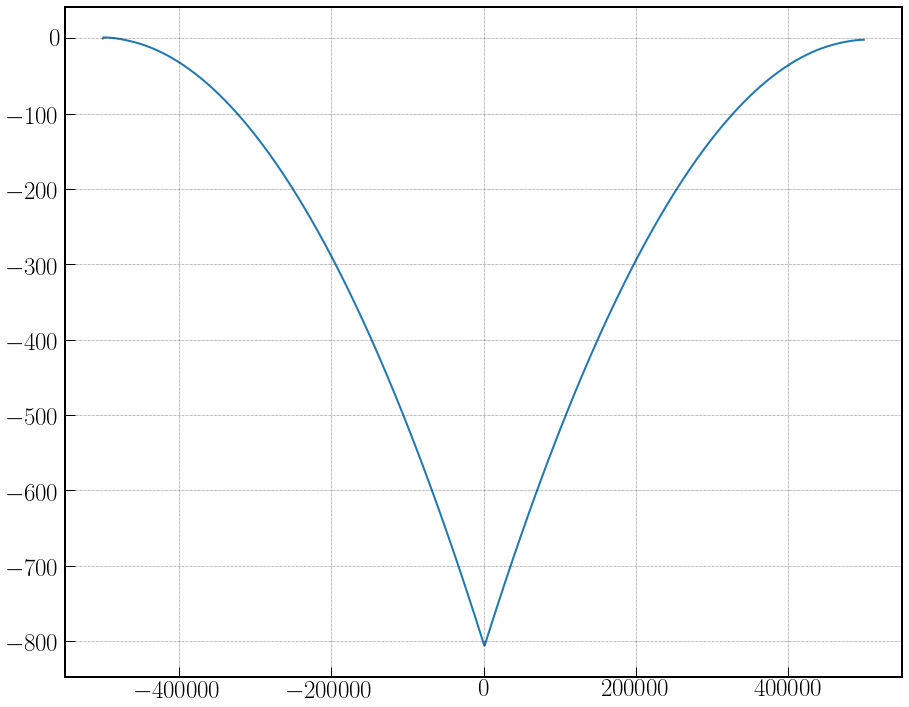

In [7]:
fig, ax = plt.subplots(figsize=(15,12))
ax.plot(freq, np.unwrap(np.angle(sz_fft)))
# ax.plot(np.imag(s), 'b')
ax.grid(which='both')
ax.axis('tight');

We want to fit the chirp profiles to a linear vs an exponential chirp profile.

In [8]:
# I'll first make my own chirp wavefuncition
T = N * 1e-6
t = np.linspace(0, T, N)
phi = 2*np.pi*(fmin * t + (df/2/T)*t**2)
s = np.exp(1j * phi)

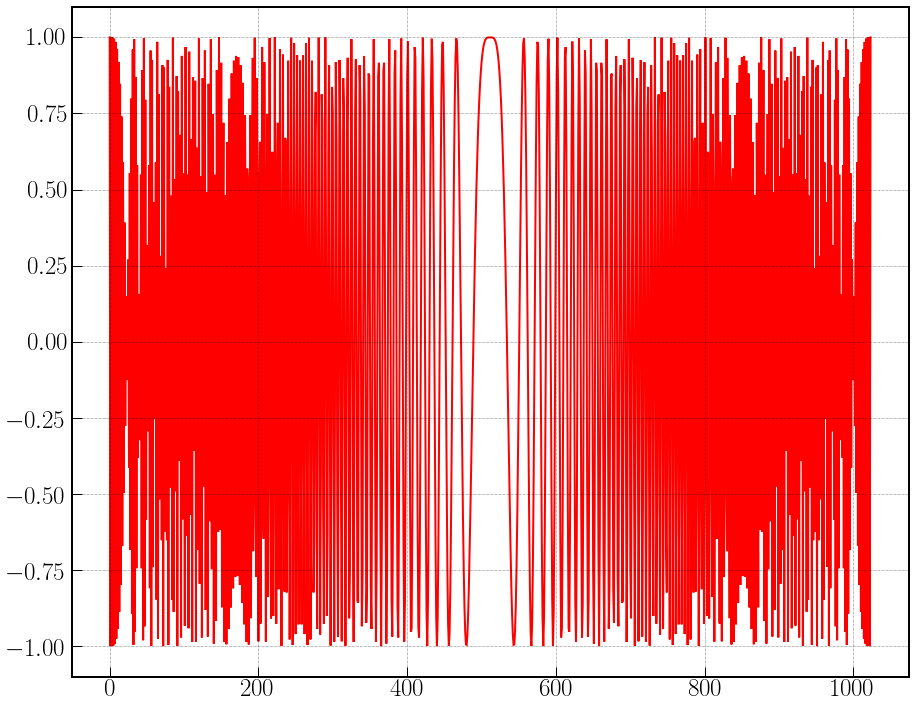

In [9]:
fig, ax = plt.subplots(figsize=(15,12))
ax.plot(np.real(s), 'r')
# ax.plot(np.imag(s), 'b')
ax.grid(which='both')
ax.axis('tight');

In [10]:
# We window the chirp to reduce the wiggles
N_taper = N//16 # For integer conversions
N_rest = N - 2 * N_taper
taper = (1 + np.cos(np.linspace(0, np.pi, N_taper)))/2

window = np.hstack([taper[::-1], np.ones(N_rest), taper])

s *= window

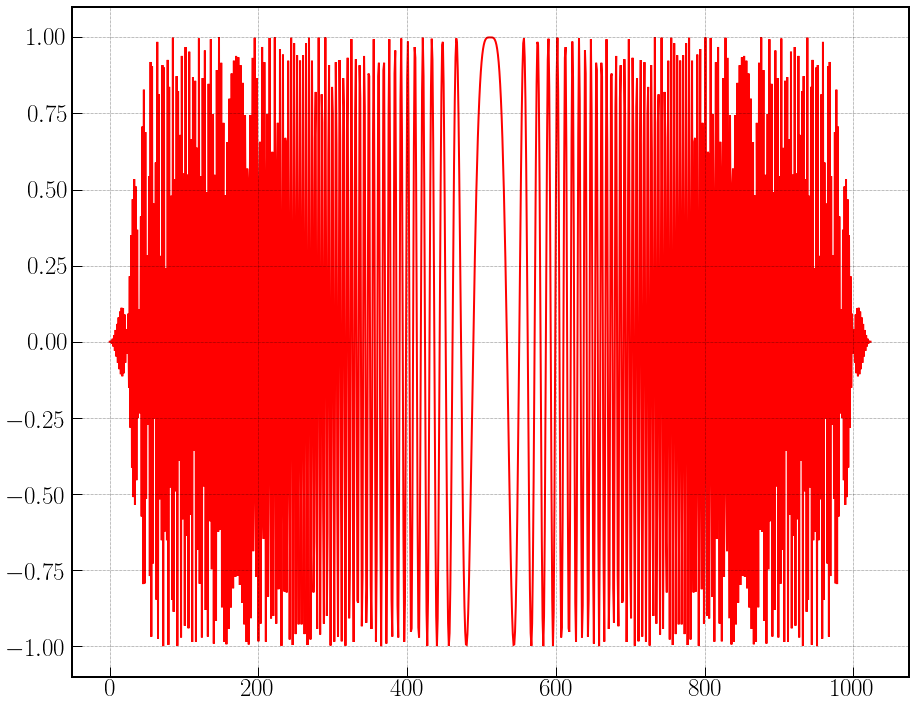

In [11]:
fig, ax = plt.subplots(figsize=(15,12))
ax.plot(np.real(s), 'r')
# ax.plot(np.imag(s), 'b')
ax.grid(which='both')
ax.axis('tight');

In [12]:
freq = fft.fftshift(fft.fftfreq(N, dt))
s_fft = fft.fftshift(fft.fft(s))

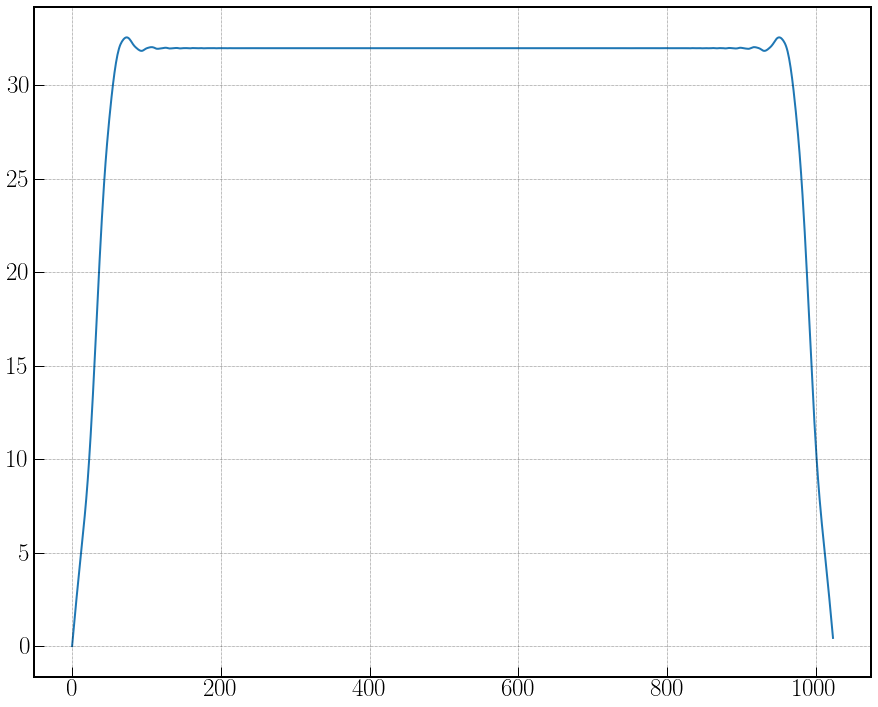

In [13]:
fig, ax = plt.subplots(figsize=(15,12))
ax.plot(np.abs(s_fft))
# ax.plot(np.imag(s), 'b')
ax.grid(which='both')
ax.axis('tight');

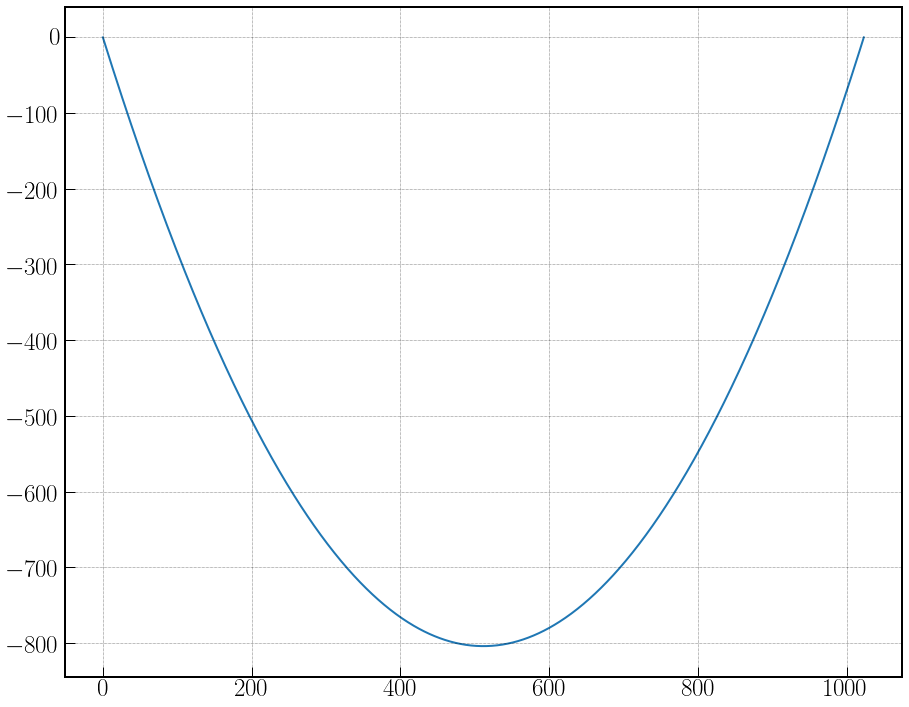

In [14]:
fig, ax = plt.subplots(figsize=(15,12))
ax.plot(np.unwrap(np.angle(s)))
# ax.plot(np.imag(s), 'b')
ax.grid(which='both')
ax.axis('tight');

In [23]:
# Transfer fn for a resonator
Qr = 1e5
Qc = 2.0*Qr
f0 = 329e6
w0 = 2*np.pi*f0
w = 2*np.pi*(freq+ f0)
# H = 1/((w0**2 - w**2)+ 1j * w*w0/Q) #works for something like a pendulum though
H = 1 - (Qr/Qc) /(1 + 1j * 2 * Qr * (w-w0)/w0)

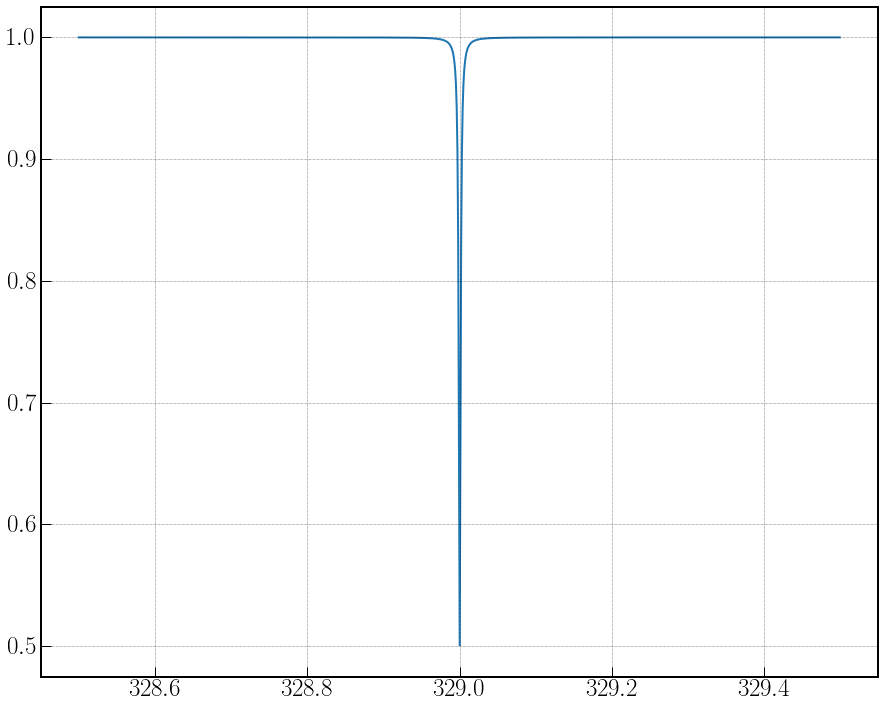

In [24]:
fig, ax = plt.subplots(figsize=(15,12))
ax.plot((freq + f0)/1e6, np.abs(H))
# ax.plot(np.imag(s), 'b')
ax.grid(which='both')
ax.axis('tight');

In [48]:
y = H * sz_fft
y_ifft = (fft.ifft(y))

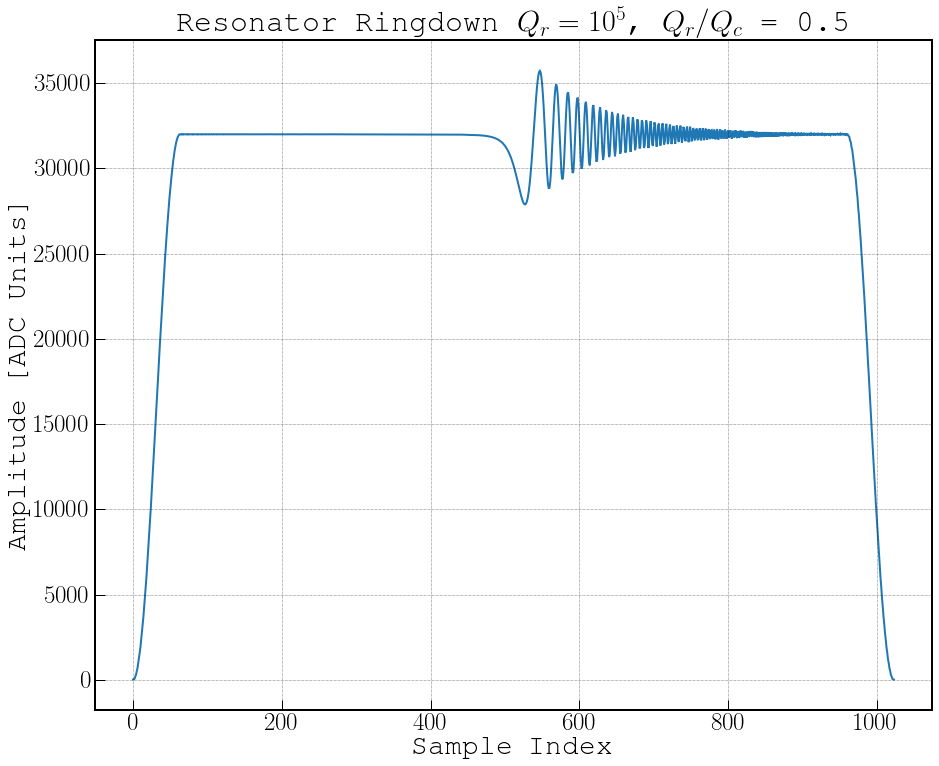

In [49]:
fig, ax = plt.subplots(figsize=(15,12))
ax.plot(np.abs(y_ifft))
# ax.plot(np.imag(s), 'b')
ax.grid(which='both')
ax.set_xlabel('Sample Index');
ax.set_ylabel('Amplitude [ADC Units]')
ax.set_title(r'Resonator Ringdown $Q_r = 10^5$, $Q_r/Q_c$ = 0.5')
ax.axis('tight');
plt.savefig('reso_response.png')

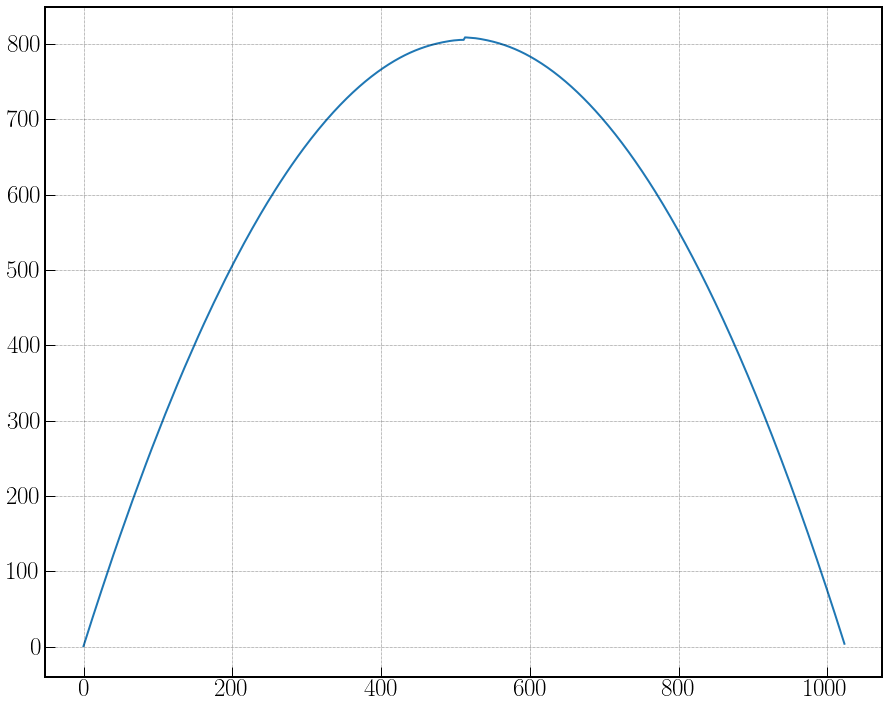

In [21]:
fig, ax = plt.subplots(figsize=(15,12))
ax.plot(np.unwrap(np.angle(fft.fftshift(y_ifft))))
# ax.plot(np.imag(s), 'b')
ax.grid(which='both')
ax.axis('tight');

In [29]:
# We can also try and generate a white noise spectrum
phi = 2 * np.pi * np.random.uniform(size=N)
zfs = np.exp(1j * phi)
zs = fft.ifft(zfs)

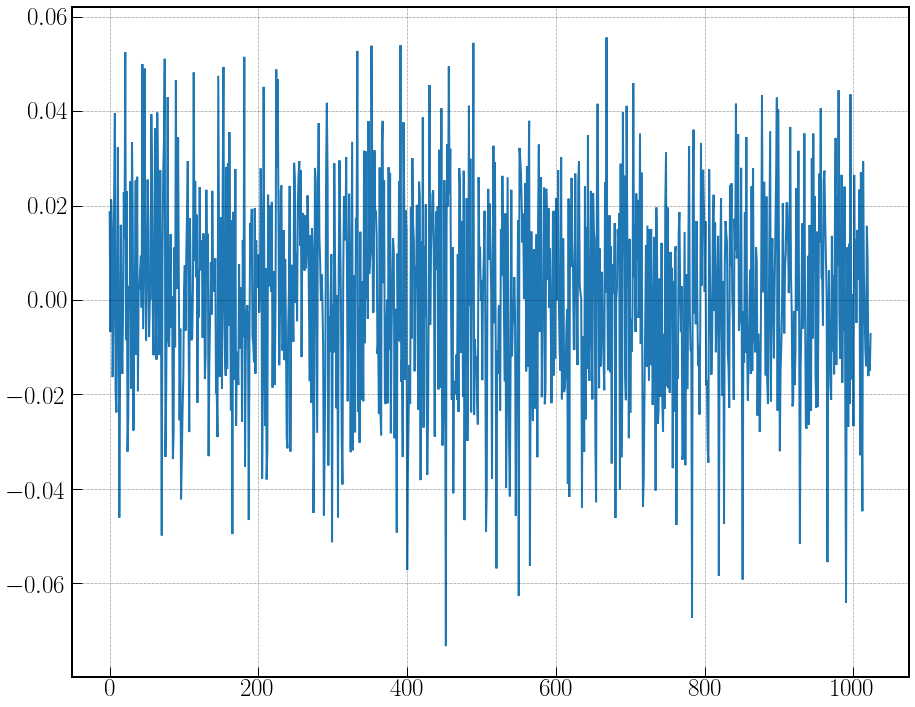

In [30]:
fig, ax = plt.subplots(figsize=(15,12))
ax.plot(np.real(zs))
# ax.plot(np.imag(s), 'b')
ax.grid(which='both')
ax.axis('tight');